# Classification of poisonous mushroom

## About  Mushroom dataset 

First column is a classifier
0. Class : edible e, poisonous p

Rest of the columns are 
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
....

## Approach

1. Separate X and y variables 
2. Use Label encoder to replace text data
3. Design multicolumn one hot encoder
4. Predict results
5. Review optimal K 

Notes : 
- There are several columns of categorical variables. We need to avoid dummy variable Trap
- Find a way to rename the columns after one hot encoder operation is done

In [1]:
import pandas as pd
import numpy as np

## 1. Separate X and y  variables

In [2]:
add = "/Users/adityapatil/Downloads/data set/mushroom/mushrooms.csv"
data = pd.read_csv(add)


In [3]:
# seperating X vaules from y values
X= data.iloc[:,1:]
y = data.iloc[:,0]

## 2.Use Label encoder to replace text data

In [4]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict (LabelEncoder)
Xfit = X.apply(lambda x: d[x.name].fit_transform(x))

In [5]:
le_y = LabelEncoder()
yfit = le_y.fit_transform(y)
# for x in Xfit.columns:
#     print(x)
#     print(Xfit[x].value_counts())

## 3. Design Multi-column One Hot encoder 

- Need to avoid dummy variable trap
- Using the "d" the defaultdictionary to rename columns after one hot encoder
- appending new columns after encoding into "final" variable

In [47]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
ohc = defaultdict (OneHotEncoder)
# Xfit_ohc = Xfit.apply(lambda x: ohc[x.name].fit_transform(x))
final = pd.DataFrame()

for i in range(22):
    # transforming the columns using One hot encoder
    Xtemp_i = pd.DataFrame(ohc[Xfit.columns[i]].fit_transform(Xfit.iloc[:,i:i+1]).toarray())
   
    #Naming the columns as per label encoder
    ohc_obj  = ohc[Xfit.columns[i]]
    labelEncoder_i= d[Xfit.columns[i]]
    Xtemp_i.columns= Xfit.columns[i]+"_"+labelEncoder_i.inverse_transform(ohc_obj.active_features_)
    
    # taking care of dummy variable trap
    X_ohc_i = Xtemp_i.iloc[:,1:]
    
    #appending the columns to final dataframe
    final = pd.concat([final,X_ohc_i],axis=1)

###  Compare final vs data 

In [16]:
final[1:4]

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data[1:5]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 4. Predict results

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfit, yfit, test_size = 0.1, random_state = 0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=30,p=2, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[423,   1],
       [ 12, 377]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.984009840098401

In [46]:
classif =  KNeighborsClassifier(n_neighbors=200,p=2, metric='minkowski')
classif.fit(X_train,y_train)
y_pred = classif.predict(X_test)
accuracy_score(y_test,y_pred)

0.931119311193112

## 5. Review optimal K 

In [48]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,200))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [37]:
from matplotlib import pyplot as plt

The optimal number of neighbors is 1


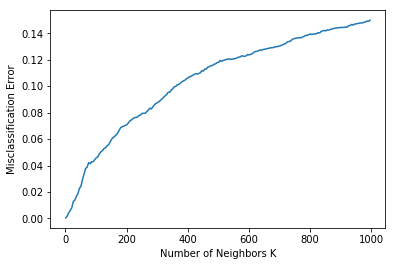

In [40]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()